pm-data/export-4B7B6566022D-1d.xlsx

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# พล็อตดูความขาดช่วงของเวลา

C:\Users\Saeb0m\AppData\Local\Temp\ipykernel_15588\142003442.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df[numeric_cols].set_index(df['timestamp']).resample('H').mean().reset_index()


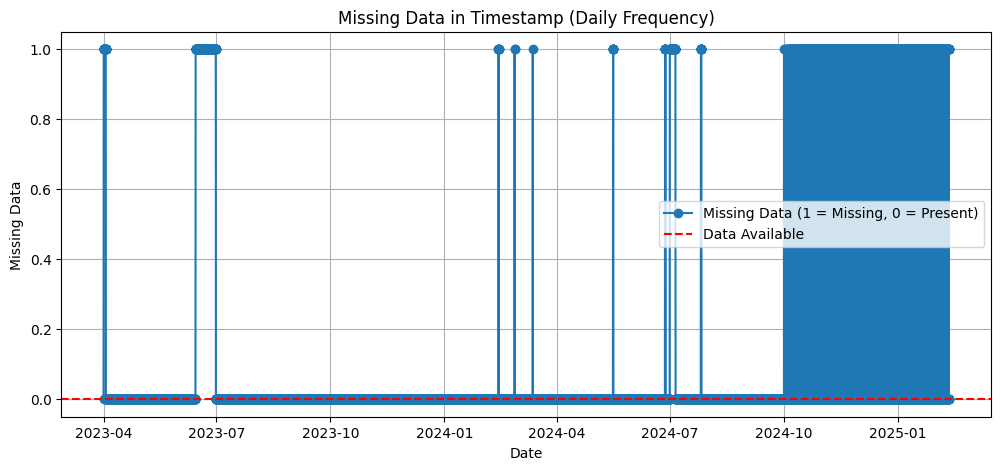

Missing Dates:
                timestamp  Unnamed: 0  humidity  pm_10  pm_2_5  pm_2_5_sp  \
1     2023-03-31 23:00:00         NaN       NaN    NaN     NaN        NaN   
2     2023-04-01 00:00:00         NaN       NaN    NaN     NaN        NaN   
3     2023-04-01 01:00:00         NaN       NaN    NaN     NaN        NaN   
4     2023-04-01 02:00:00         NaN       NaN    NaN     NaN        NaN   
5     2023-04-01 03:00:00         NaN       NaN    NaN     NaN        NaN   
...                   ...         ...       ...    ...     ...        ...   
16373 2025-02-11 03:00:00         NaN       NaN    NaN     NaN        NaN   
16374 2025-02-11 04:00:00         NaN       NaN    NaN     NaN        NaN   
16375 2025-02-11 05:00:00         NaN       NaN    NaN     NaN        NaN   
16376 2025-02-11 06:00:00         NaN       NaN    NaN     NaN        NaN   
16377 2025-02-11 07:00:00         NaN       NaN    NaN     NaN        NaN   

       temperature  
1              NaN  
2              NaN

In [23]:
# โหลดข้อมูล
df = pd.read_excel("pm-data/export-pm25_eng-1h.xlsx")

# แปลงคอลัมน์ Timestamp เป็น datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_cols = df.select_dtypes(include=['number']).columns

# สร้างช่วงเวลาแบบรายวัน (ใช้เฉพาะคอลัมน์ตัวเลข)
df_resampled = df[numeric_cols].set_index(df['timestamp']).resample('H').mean().reset_index()

# คำนวณช่วงเวลาที่ขาดหาย (ต่างกันเกินปกติ)
missing_dates = df_resampled[df_resampled.isnull().any(axis=1)]

# พล็อตกราฟเพื่อดูว่ามีข้อมูลวันไหนที่ขาดหาย
plt.figure(figsize=(12, 5))
plt.plot(df_resampled['timestamp'], df_resampled.isnull().any(axis=1), marker='o', linestyle='-', label="Missing Data (1 = Missing, 0 = Present)")
plt.axhline(0, color='r', linestyle='--', label="Data Available")
plt.xlabel("Date")
plt.ylabel("Missing Data")
plt.title("Missing Data in Timestamp (Daily Frequency)")
plt.legend()
plt.grid()
plt.show()

# แสดงข้อมูลวันที่ขาดหาย
print("Missing Dates:")
print(missing_dates)


Note - เริ่มเอา 2023 เดือน 7

## พล็อตดูค่าผิดปกติ

In [24]:
# Drop NaN values caused by shifting
df.dropna(inplace=True)
df = df.drop(columns=["Unnamed: 0", "timezone", "pm_2_5_sp", 'pm_10'], axis=1)

In [26]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก
df

,timestamp,humidity,pm_2_5,temperature
0,2023-03-31 22:00:00.000,62.659563,4.727273,27.147784
1,2023-04-02 18:00:00.000,69.995698,7.142857,32.246966
2,2023-04-02 19:00:00.000,65.608215,7.800000,32.518829
3,2023-04-02 20:00:00.000,65.489705,8.266667,31.864227
4,2023-04-02 21:00:00.000,65.811462,9.083333,31.412888
...,...,...,...,...
14791,2025-02-11 08:00:00.000,90.929747,37.568627,23.684319
14792,2025-02-11 09:00:00.000,83.511569,38.800000,25.896389
14793,2025-02-11 10:00:00.000,72.046736,23.333333,28.852626
14794,2025-02-11 11:00:00.000,64.332405,21.850000,30.593716


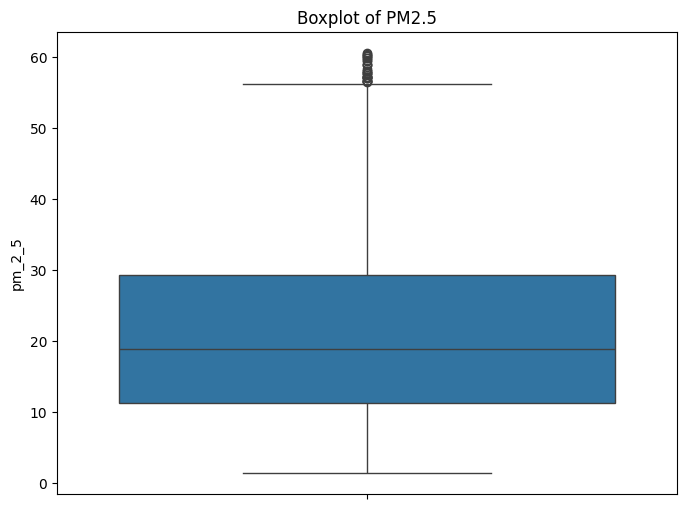

In [27]:
# BOXPLOT FIRST

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm2.5
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["pm_2_5"])
plt.title("Boxplot of PM2.5")
plt.show()

In [12]:
filtered_df = df[df['Unnamed: 0'].between(164, 166)]
filtered_df

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature


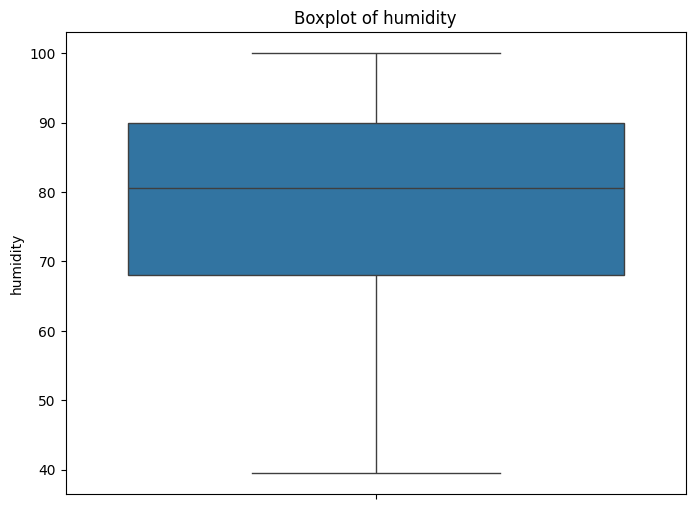

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["humidity"])
plt.title("Boxplot of humidity")
plt.show()

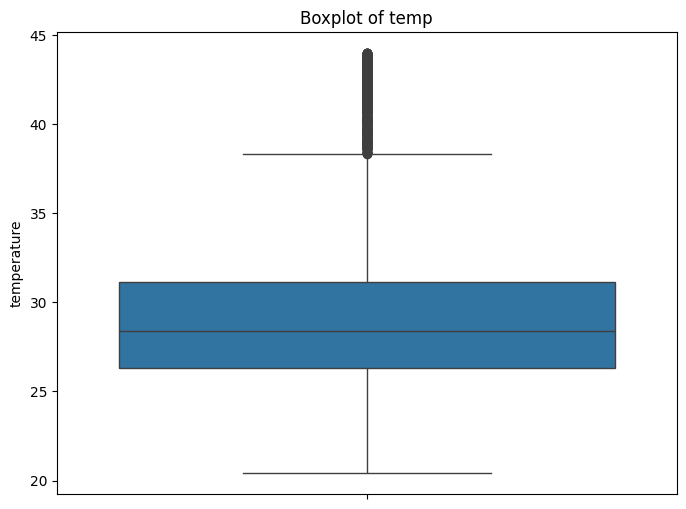

In [31]:
# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ temp
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["temperature"])
plt.title("Boxplot of temp")
plt.show()

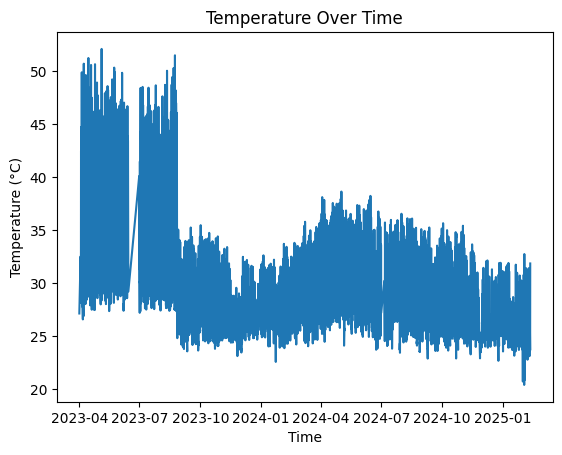

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, y="temperature", x="timestamp")
plt.title("Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.show()


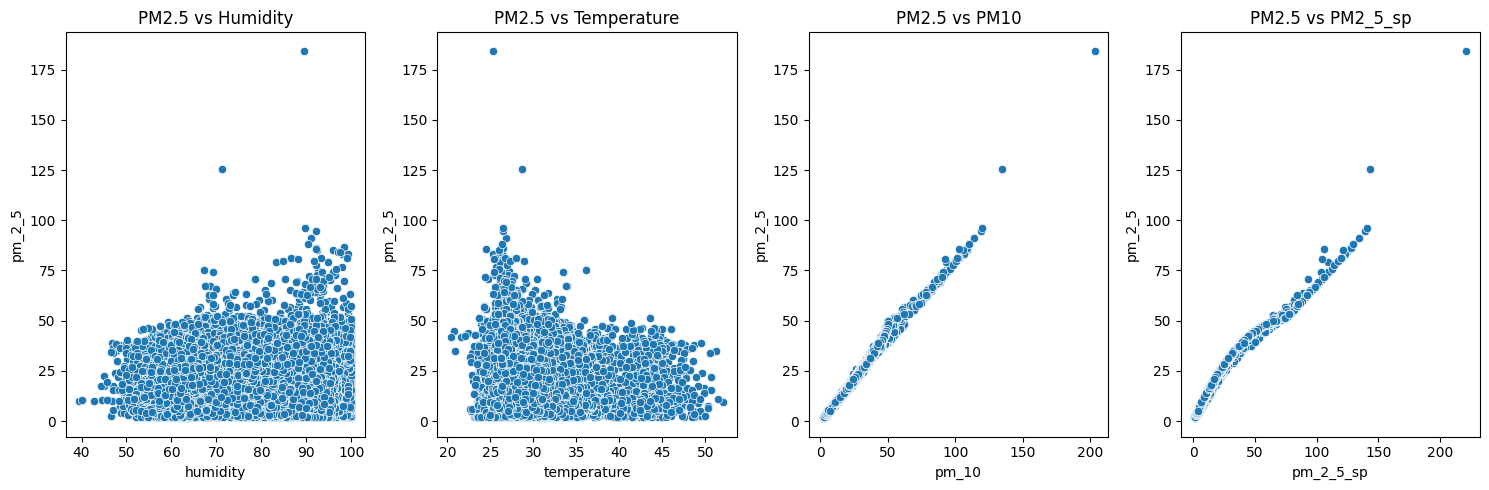

In [54]:
# SCATTER FIRST

# พล็อต scatter plot เพื่อดูความสัมพันธ์ของ pm2.5 กับตัวแปรอื่น ๆ
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.scatterplot(x=df["humidity"], y=df["pm_2_5"], ax=axes[0])
axes[0].set_title("PM2.5 vs Humidity")

sns.scatterplot(x=df["temperature"], y=df["pm_2_5"], ax=axes[1])
axes[1].set_title("PM2.5 vs Temperature")

sns.scatterplot(x=df["pm_10"], y=df["pm_2_5"], ax=axes[2])
axes[2].set_title("PM2.5 vs PM10")

sns.scatterplot(x=df["pm_2_5_sp"], y=df["pm_2_5"], ax=axes[3])
axes[3].set_title("PM2.5 vs PM2_5_sp")

plt.tight_layout()
plt.show()

# Clean!

In [55]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'timezone', 'humidity', 'pm_10', 'pm_2_5',
       'pm_2_5_sp', 'temperature'],
      dtype='object')

In [56]:
# กรองข้อมูลที่เริ่มตั้งแต่เดือนกรกฎาคม 2023 เป็นต้นไป
filtered_df = df[df['timestamp'] >= '2023-09-01']

In [58]:
df.shape

(14796, 8)

In [59]:
filtered_df.shape

(11558, 8)

C:\Users\Saeb0m\AppData\Local\Temp\ipykernel_24892\4067424298.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = filtered_df[numeric_cols].set_index(filtered_df['timestamp']).resample('H').mean().reset_index()


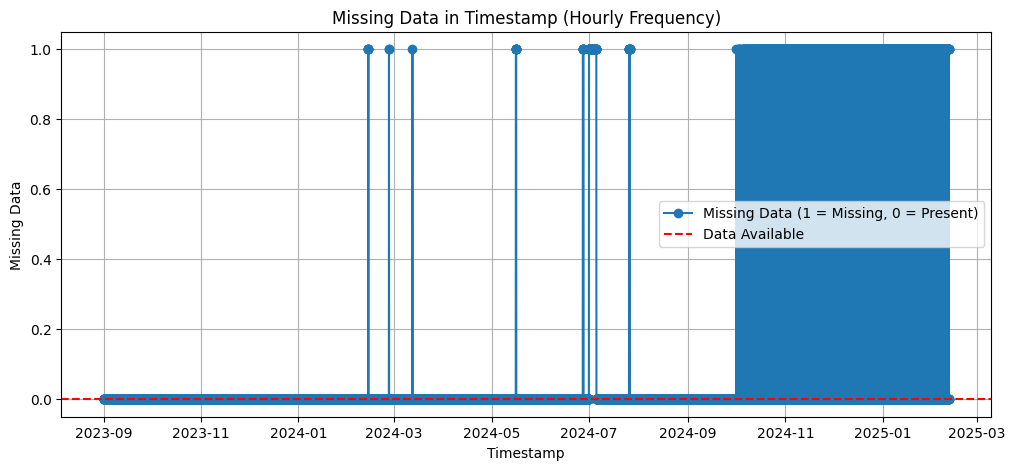

Missing Timestamps:
                timestamp  Unnamed: 0  humidity  pm_10  pm_2_5  pm_2_5_sp  \
3977  2024-02-13 17:00:00         NaN       NaN    NaN     NaN        NaN   
3978  2024-02-13 18:00:00         NaN       NaN    NaN     NaN        NaN   
3979  2024-02-13 19:00:00         NaN       NaN    NaN     NaN        NaN   
3980  2024-02-13 20:00:00         NaN       NaN    NaN     NaN        NaN   
3981  2024-02-13 21:00:00         NaN       NaN    NaN     NaN        NaN   
...                   ...         ...       ...    ...     ...        ...   
12699 2025-02-11 03:00:00         NaN       NaN    NaN     NaN        NaN   
12700 2025-02-11 04:00:00         NaN       NaN    NaN     NaN        NaN   
12701 2025-02-11 05:00:00         NaN       NaN    NaN     NaN        NaN   
12702 2025-02-11 06:00:00         NaN       NaN    NaN     NaN        NaN   
12703 2025-02-11 07:00:00         NaN       NaN    NaN     NaN        NaN   

       temperature  
3977           NaN  
3978         

In [62]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_cols = filtered_df.select_dtypes(include=['number']).columns

# สร้างช่วงเวลาแบบรายวัน (ใช้เฉพาะคอลัมน์ตัวเลข)
df_resampled = filtered_df[numeric_cols].set_index(filtered_df['timestamp']).resample('H').mean().reset_index()

# คำนวณช่วงเวลาที่ขาดหาย (ต่างกันเกินปกติ)
missing_dates = df_resampled[df_resampled.isnull().any(axis=1)]

# พล็อตกราฟเพื่อดูว่ามีข้อมูลวันไหนที่ขาดหาย
plt.figure(figsize=(12, 5))
plt.plot(df_resampled['timestamp'], df_resampled.isnull().any(axis=1), marker='o', linestyle='-', label="Missing Data (1 = Missing, 0 = Present)")
plt.axhline(0, color='r', linestyle='--', label="Data Available")
plt.xlabel("Timestamp")
plt.ylabel("Missing Data")
plt.title("Missing Data in Timestamp (Hourly Frequency)")  # เปลี่ยนจาก Daily เป็น Hourly
plt.legend()
plt.grid()
plt.show()


# แสดงข้อมูลวันที่ขาดหาย
print("Missing Timestamps:")
print(missing_dates)


## เติมช่วงวันที่หายไป

In [43]:
# แปลง timestamp ให้เป็น datetime เพื่อความถูกต้อง
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])

# ตั้งค่า index เป็น timestamp เพื่อให้สามารถ reindex ได้
filtered_df.set_index('timestamp', inplace=True)

# สร้างช่วงเวลาที่ควรจะมีข้อมูล (ตามความถี่ที่ต้องการ เช่น รายวัน)
full_range = pd.date_range(start=filtered_df.index.min(), end=filtered_df.index.max(), freq='H')

# เติมแถวที่ขาดหาย
filtered_df = filtered_df.reindex(full_range)

# คำนวณค่าเฉลี่ยของแถวก่อนหน้าและหลังจากช่วงที่ขาด
for col in filtered_df.select_dtypes(include=['number']).columns:
    filtered_df[col] = filtered_df[col].interpolate(method='linear')  # เติมค่าด้วย interpolation

# รีเซ็ต index กลับมาเป็น DataFrame ปกติ
filtered_df.reset_index(inplace=True)
filtered_df.rename(columns={'index': 'timestamp'}, inplace=True)

# ตรวจสอบว่าข้อมูลถูกเติมครบหรือไม่
print(filtered_df.iloc[304:307])  # ดูช่วงที่มีการเติมข้อมูล

              timestamp  Unnamed: 0 timezone   humidity      pm_10     pm_2_5  \
304 2023-09-13 16:00:00      3542.0      NaN  90.752895  42.916667  38.722222   
305 2023-09-13 17:00:00      3543.0      NaN  90.179150  42.527083  38.229861   
306 2023-09-13 18:00:00      3544.0      NaN  89.605406  42.137500  37.737500   

     pm_2_5_sp  temperature  
304  40.116667    26.485983  
305  39.200000    26.542892  
306  38.283333    26.599801  


C:\Users\Saeb0m\AppData\Local\Temp\ipykernel_24892\1665692875.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=filtered_df.index.min(), end=filtered_df.index.max(), freq='H')


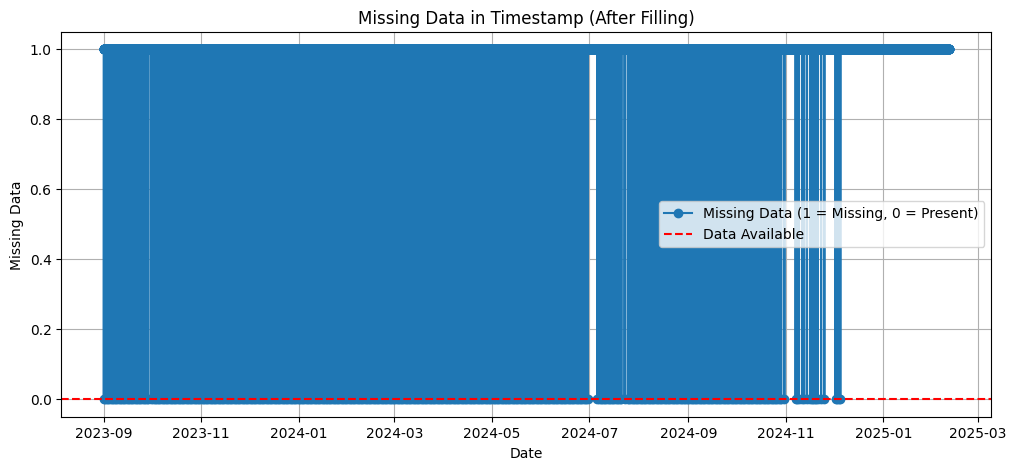

In [44]:
# พล็อตกราฟแสดงข้อมูลก่อนและหลังเติมค่าหายไป
plt.figure(figsize=(12, 5))
plt.plot(filtered_df['timestamp'], filtered_df.isnull().any(axis=1), marker='o', linestyle='-', label="Missing Data (1 = Missing, 0 = Present)")
plt.axhline(0, color='r', linestyle='--', label="Data Available")
plt.xlabel("Date")
plt.ylabel("Missing Data")
plt.title("Missing Data in Timestamp (After Filling)")
plt.legend()
plt.grid()
plt.show()

# พล็อตหลัง CLEAN

In [38]:
filtered_df = filtered_df[filtered_df['pm_2_5_sp'] <= 80] #กรอง

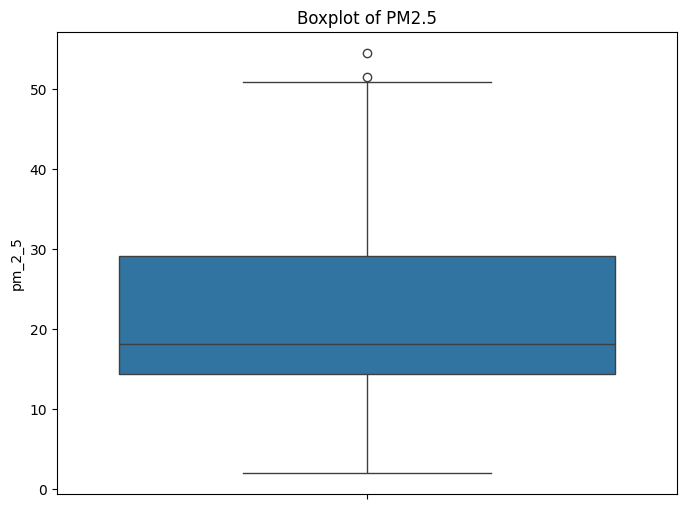

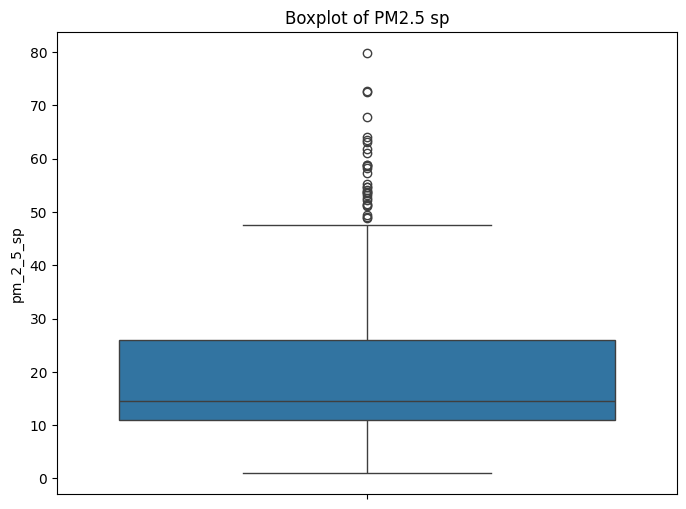

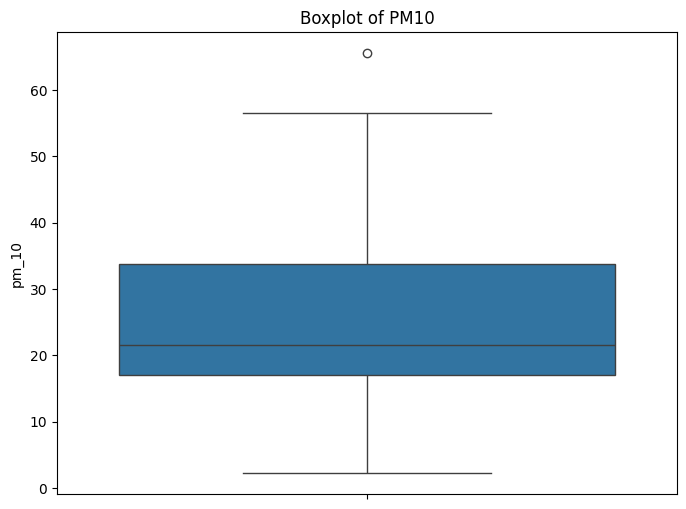

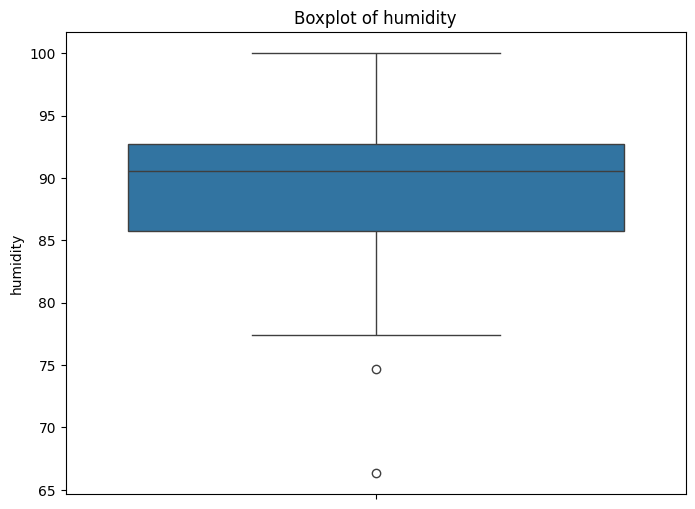

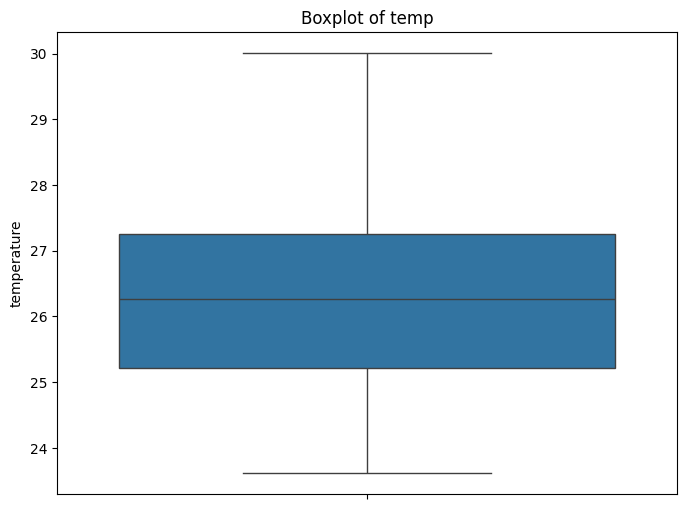

In [39]:
# BOXPLOT TWO

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm2.5
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df["pm_2_5"])
plt.title("Boxplot of PM2.5")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm2.5 sp
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df["pm_2_5_sp"])
plt.title("Boxplot of PM2.5 sp")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df["pm_10"])
plt.title("Boxplot of PM10")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df["humidity"])
plt.title("Boxplot of humidity")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df["temperature"])
plt.title("Boxplot of temp")
plt.show()

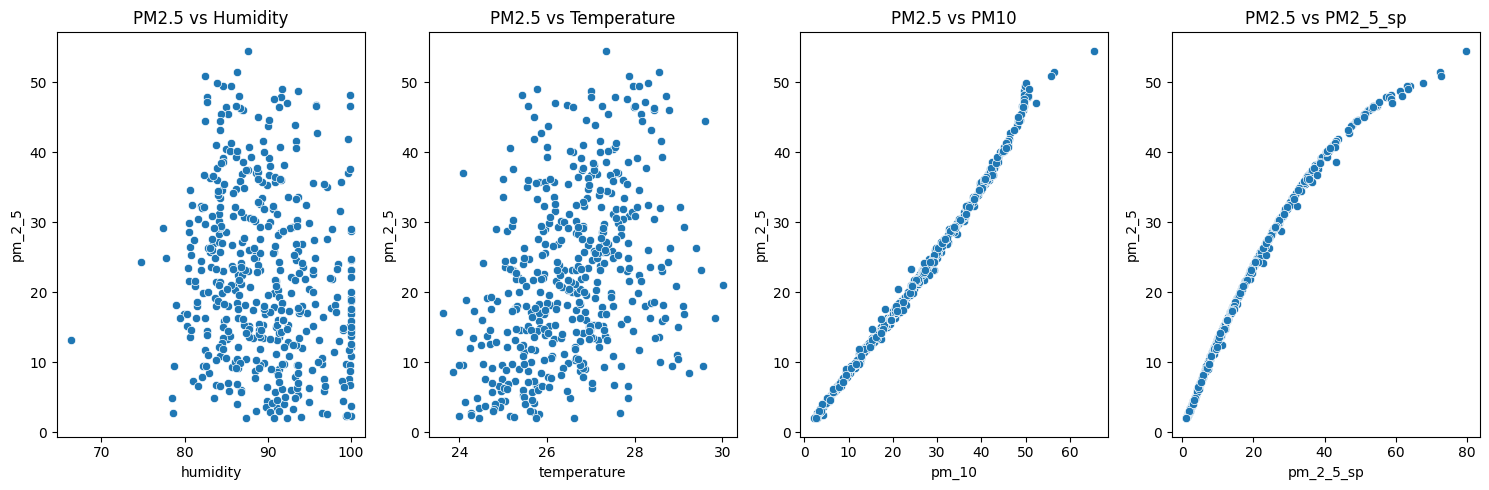

In [40]:
# SCATTER TWO

# พล็อต scatter plot เพื่อดูความสัมพันธ์ของ pm2.5 กับตัวแปรอื่น ๆ
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.scatterplot(x=filtered_df["humidity"], y=filtered_df["pm_2_5"], ax=axes[0])
axes[0].set_title("PM2.5 vs Humidity")

sns.scatterplot(x=filtered_df["temperature"], y=filtered_df["pm_2_5"], ax=axes[1])
axes[1].set_title("PM2.5 vs Temperature")

sns.scatterplot(x=filtered_df["pm_10"], y=filtered_df["pm_2_5"], ax=axes[2])
axes[2].set_title("PM2.5 vs PM10")

sns.scatterplot(x=filtered_df["pm_2_5_sp"], y=filtered_df["pm_2_5"], ax=axes[3])
axes[3].set_title("PM2.5 vs PM2_5_sp")

plt.tight_layout()
plt.show()

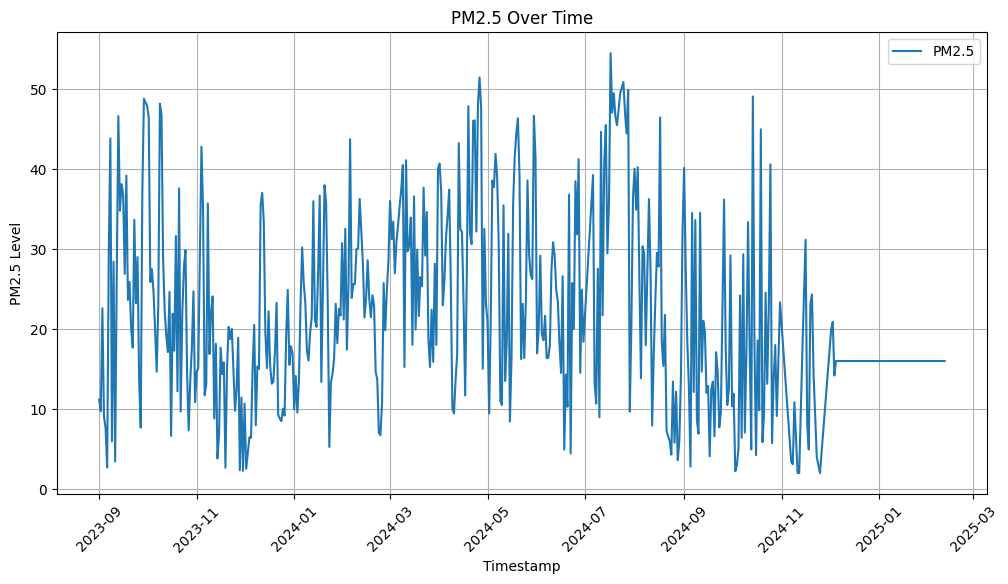

In [41]:
# สมมุติว่า df เป็น DataFrame ที่มีข้อมูล PM2.5 และ timestamp
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['timestamp'], filtered_df['pm_2_5'], linestyle='-', label="PM2.5")

plt.xlabel("Timestamp")
plt.ylabel("PM2.5 Level")
plt.title("PM2.5 Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


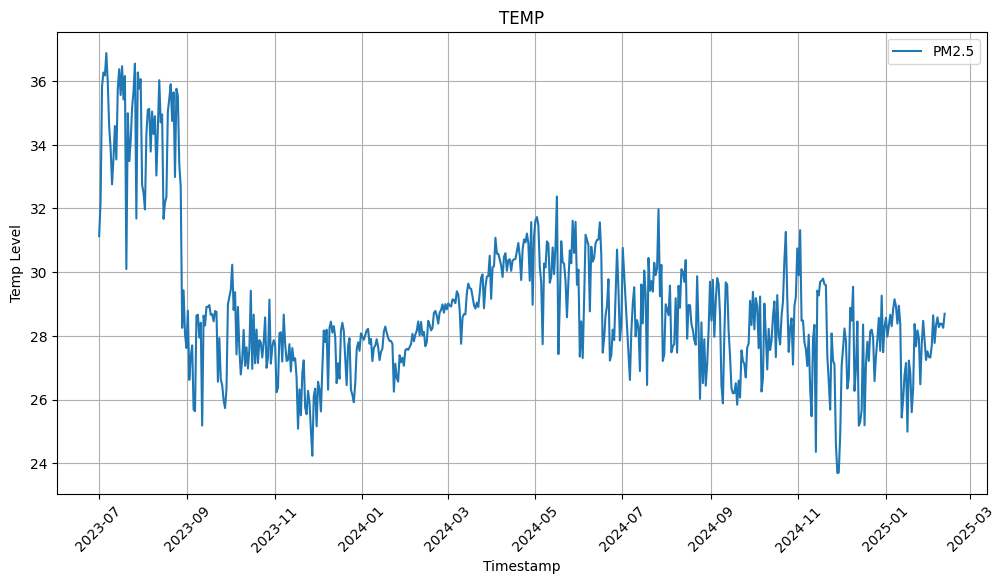

In [32]:
# สมมุติว่า df เป็น DataFrame ที่มีข้อมูล PM2.5 และ timestamp
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['timestamp'], filtered_df['temperature'], linestyle='-', label="PM2.5")

plt.xlabel("Timestamp")
plt.ylabel("Temp Level")
plt.title("TEMP")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

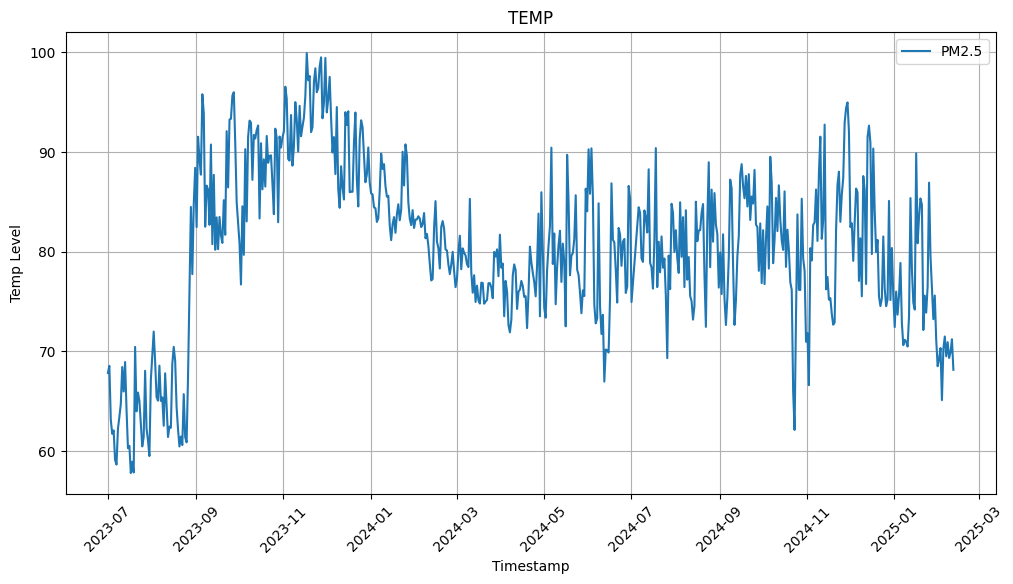

In [33]:
# สมมุติว่า df เป็น DataFrame ที่มีข้อมูล PM2.5 และ timestamp
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['timestamp'], filtered_df['humidity'], linestyle='-', label="PM2.5")

plt.xlabel("Timestamp")
plt.ylabel("Temp Level")
plt.title("TEMP")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Prepare for Export

In [34]:
filtered_df.columns

Index(['timestamp', 'humidity', 'pm_10', 'pm_2_5', 'pm_2_5_sp', 'temperature'], dtype='object')

In [35]:
filtered_df.drop(columns=['Unnamed: 0', 'timezone'], inplace=True)

KeyError: "['Unnamed: 0', 'timezone'] not found in axis"

In [25]:
filtered_df.head()

,timestamp,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature
0,2023-07-01 07:00:00,67.844074,12.634307,11.081056,8.796418,31.131941
1,2023-07-02 07:00:00,68.552865,11.350789,9.705165,7.547346,32.240924
2,2023-07-03 07:00:00,63.142228,13.457203,11.469033,8.783577,35.841610
3,2023-07-04 07:00:00,61.741030,29.167827,26.188719,25.657382,36.269393
4,2023-07-05 07:00:00,62.085527,28.747735,25.508711,23.605575,36.176134


In [26]:
# ตรวจสอบให้แน่ใจว่า 'timestamp' เป็น datetime
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])

# # ตั้ง 'timestamp' เป็น index
# filtered_df.set_index('timestamp', inplace=True)

# ดูข้อมูลเบื้องต้นหลังจากตั้ง 'timestamp' เป็น index
filtered_df.head()

,timestamp,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature
0,2023-07-01 07:00:00,67.844074,12.634307,11.081056,8.796418,31.131941
1,2023-07-02 07:00:00,68.552865,11.350789,9.705165,7.547346,32.240924
2,2023-07-03 07:00:00,63.142228,13.457203,11.469033,8.783577,35.841610
3,2023-07-04 07:00:00,61.741030,29.167827,26.188719,25.657382,36.269393
4,2023-07-05 07:00:00,62.085527,28.747735,25.508711,23.605575,36.176134


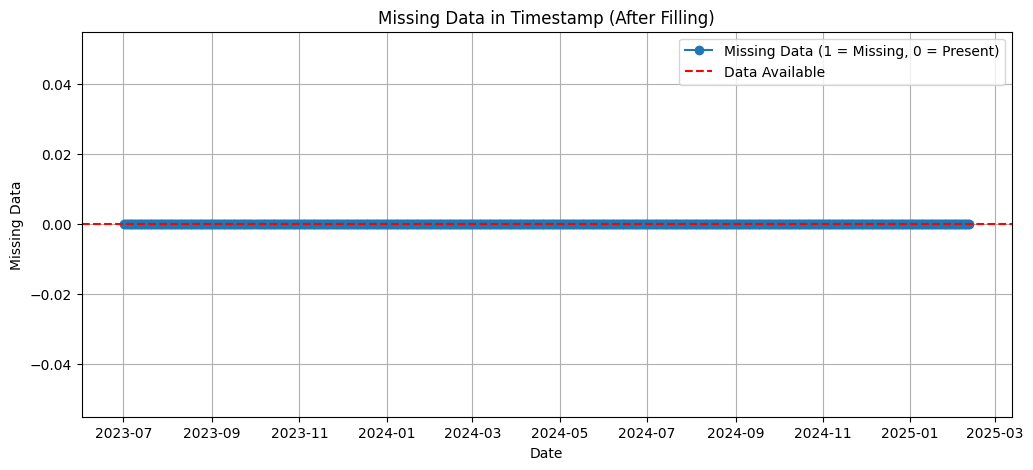

In [38]:
# พล็อตกราฟแสดงข้อมูลก่อนและหลังเติมค่าหายไป
plt.figure(figsize=(12, 5))
plt.plot(filtered_df['timestamp'], filtered_df.isnull().any(axis=1), marker='o', linestyle='-', label="Missing Data (1 = Missing, 0 = Present)")
plt.axhline(0, color='r', linestyle='--', label="Data Available")
plt.xlabel("Date")
plt.ylabel("Missing Data")
plt.title("Missing Data in Timestamp (After Filling)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# # กำหนดชื่อไฟล์ที่ต้องการบันทึก
# filename = 'export_data/filtered_data_3_best.csv'

# # บันทึก DataFrame เป็นไฟล์ CSV
# filtered_df.to_csv(filename, index=False)

# print(f"ไฟล์ CSV ถูกบันทึกที่ {filename}")

ไฟล์ CSV ถูกบันทึกที่ export_data/filtered_data_3_best.csv


In [ ]:
# # กำหนดชื่อไฟล์ที่ต้องการบันทึก
# filename = 'export_data/filtered_data_3_best.xlsx'

# # บันทึก DataFrame เป็นไฟล์ Excel
# filtered_df.to_excel(filename, index=True)  # ตั้ง index=True เพื่อให้ timestamp อยู่ในไฟล์

# print(f"ไฟล์ Excel ถูกบันทึกที่ {filename}")

ไฟล์ Excel ถูกบันทึกที่ export_data/filtered_data_3_best.xlsx
